## Imports Used

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Loading in the data

In [27]:
train = pd.read_csv('data/train.csv', header=0)
test = pd.read_csv('data/test.csv', header=0)

## Data Cleaning

Here we combine the train and test datasets before we throw them into our model. Initially we looked to test for survival from pclass, sex, age, sibsp, parch, and fare. Since the data sets contain some missing values, we also chose to drop the rows the contian null values. 

In [28]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Here we set male as 0 and female as 1 since we want out model to only read in numeric values. In this version of the Ridge Regression code, we utilized the IterativeImputer package to fill in missing (NaN) values in our dataset rather than just removing the whole row before thowing it into our model.

In [29]:
train['Sex'] = train['Sex'].replace({'male':0})
train['Sex'] = train['Sex'].replace({'female':1})

test['Sex'] = test['Sex'].replace({'male':0})
test['Sex'] = test['Sex'].replace({'female':1})


train = train[['Survived','Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

#Imported package to fill in missing data in dataframe
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute_it = IterativeImputer(random_state=0)
df_imputed = impute_it.fit_transform(train)


df_imputed = pd.DataFrame(df_imputed, columns=train.columns)

# df_imputed will have the missing values filled
print(df_imputed)

     Survived  Pclass  Sex        Age  SibSp  Parch     Fare
0         0.0     3.0  0.0  22.000000    1.0    0.0   7.2500
1         1.0     1.0  1.0  38.000000    1.0    0.0  71.2833
2         1.0     3.0  1.0  26.000000    0.0    0.0   7.9250
3         1.0     1.0  1.0  35.000000    1.0    0.0  53.1000
4         0.0     3.0  0.0  35.000000    0.0    0.0   8.0500
..        ...     ...  ...        ...    ...    ...      ...
886       0.0     2.0  0.0  27.000000    0.0    0.0  13.0000
887       1.0     1.0  1.0  19.000000    0.0    0.0  30.0000
888       0.0     3.0  1.0  23.274703    1.0    2.0  23.4500
889       1.0     1.0  0.0  26.000000    0.0    0.0  30.0000
890       0.0     3.0  0.0  32.000000    0.0    0.0   7.7500

[891 rows x 7 columns]


In [30]:
train_X = df_imputed.drop(['Survived'], axis = 1).to_numpy()
train_y = df_imputed['Survived'].to_numpy()

test_X = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].to_numpy()

train_X

array([[ 3.        ,  0.        , 22.        ,  1.        ,  0.        ,
         7.25      ],
       [ 1.        ,  1.        , 38.        ,  1.        ,  0.        ,
        71.2833    ],
       [ 3.        ,  1.        , 26.        ,  0.        ,  0.        ,
         7.925     ],
       ...,
       [ 3.        ,  1.        , 23.27470333,  1.        ,  2.        ,
        23.45      ],
       [ 1.        ,  0.        , 26.        ,  0.        ,  0.        ,
        30.        ],
       [ 3.        ,  0.        , 32.        ,  0.        ,  0.        ,
         7.75      ]])

In [31]:
from sklearn.model_selection import train_test_split

#Splits training data into training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(train_X, train_y, test_size=0.2, random_state=0)


Here we build our Logistics Regression model with an L2 (Ridge) penalty. We configured hyperparamters such as Cs and cv. 
Notes:
-   The highter the Cs was set, the more time out logistic model took to run. 
-   We could only set a cv of 9 or less since the least populated class in y has only 9 members. 

In [32]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

clf = LogisticRegressionCV(penalty='l2', solver='liblinear', Cs=200, cv=9)
steps = [('scalar', MinMaxScaler()),
         ('log', clf)]
pipe = Pipeline(steps=steps)
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, val_scores = learning_curve(pipe, X_train, y_train,
                                                        train_sizes=np.linspace(0.1, 1, 20))

The following shows the accuracy scores of our Training and Validation data. 
Note:
-   The accuracy score of our training data improved, but the validation score slightly descreased compared to the frist version of our Ridge Regression model. 

In [33]:
clf.fit(X_train, y_train)

print("Accruacy Score of Training: %.4f" % clf.score(X_train, y_train))
print("Accuracy Score of Validation %.4f" % clf.score(X_val, y_val))

Accruacy Score of Training: 0.8188
Accuracy Score of Validation 0.8212


## Ploting the learning curve

The learning curves indicated slight improvement, but there are still some cases of overfitting with the plot.

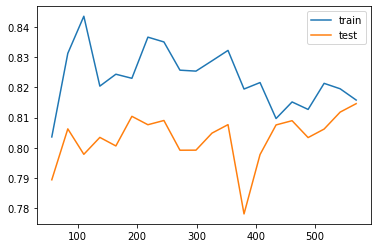

In [34]:
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, val_scores.mean(axis=1), label='test')
plt.legend()

In [35]:
predictions = clf.predict(X_val)

## Confusion Matrix

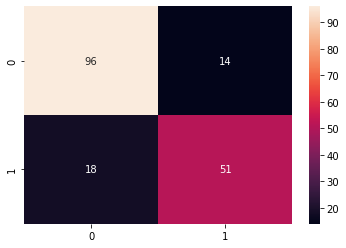

In [36]:
cm=confusion_matrix(y_val, predictions)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 

## ROC Curve

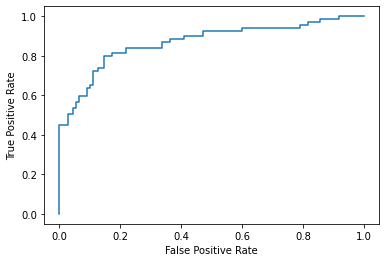

In [37]:
from sklearn import metrics

y_pred_proba = clf.predict_proba(X_val)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
